In [ ]:
import pandas as pd
import seaborn as sns
#df = pd.read_csv('/content/Student Mental health.csv')


In [ ]:
print(df.head())
print(df.info())


        Timestamp Choose your gender   Age What is your course?  \
0  8/7/2020 12:02             Female  18.0          Engineering   
1  8/7/2020 12:04               Male  21.0    Islamic education   
2  8/7/2020 12:05               Male  19.0                  BIT   
3  8/7/2020 12:06             Female  22.0                 Laws   
4  8/7/2020 12:13               Male  23.0         Mathemathics   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No   
3                     year 3        3.00 - 3.49            Yes   
4                     year 4        3.00 - 3.49             No   

  Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
0                     Yes                   No                       Yes   
1                      No                  Yes  

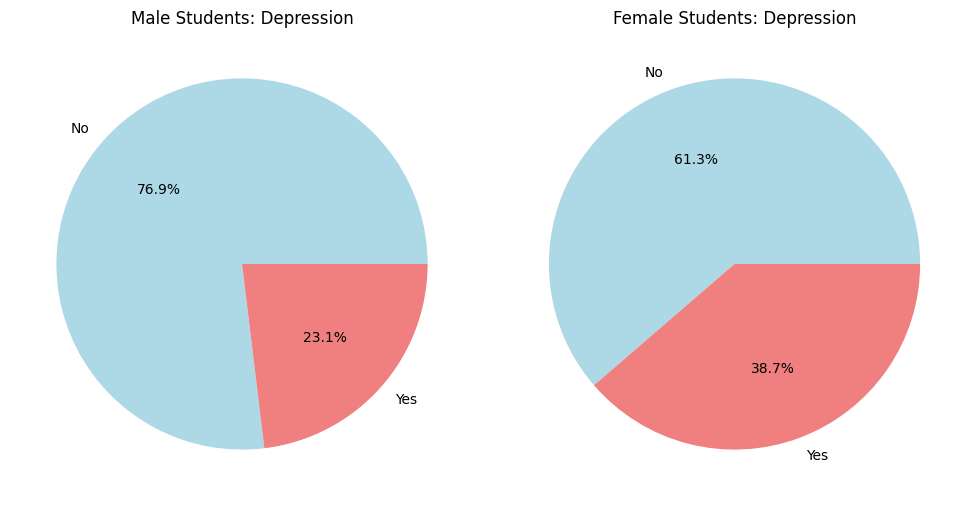

In [ ]:
import matplotlib.pyplot as plt

male_df = df[df['Choose your gender'] == 'Male']
female_df = df[df['Choose your gender'] == 'Female']
depression_male = male_df['Do you have Depression?'].value_counts()
depression_female = female_df['Do you have Depression?'].value_counts()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(depression_male, labels=depression_male.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Male Students: Depression')

plt.subplot(1, 2, 2)
plt.pie(depression_female, labels=depression_female.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Female Students: Depression')
plt.legend()
plt.tight_layout()
plt.show()



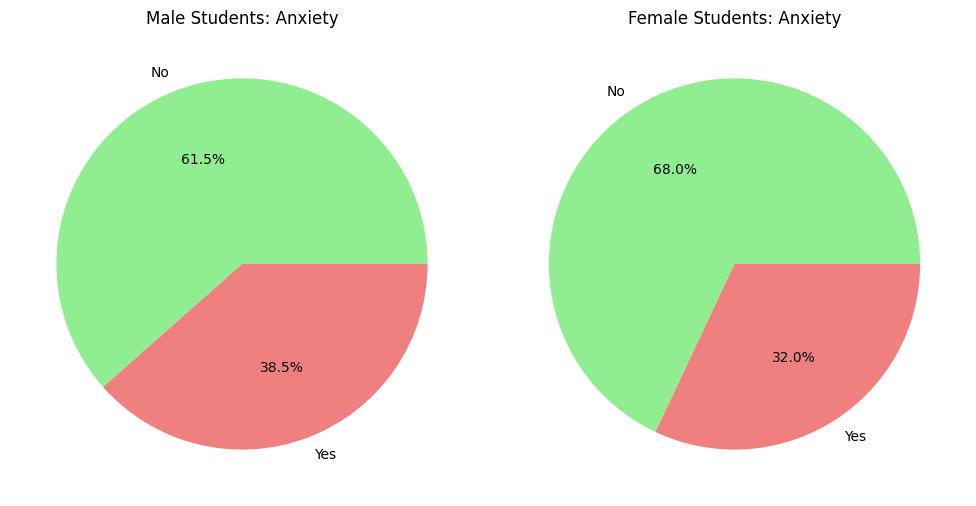

In [ ]:

anxiety_male = male_df['Do you have Anxiety?'].value_counts()
anxiety_female = female_df['Do you have Anxiety?'].value_counts()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(anxiety_male, labels=anxiety_male.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Male Students: Anxiety')

plt.subplot(1, 2, 2)
plt.pie(anxiety_female, labels=anxiety_female.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Female Students: Anxiety')

plt.tight_layout()
plt.show()


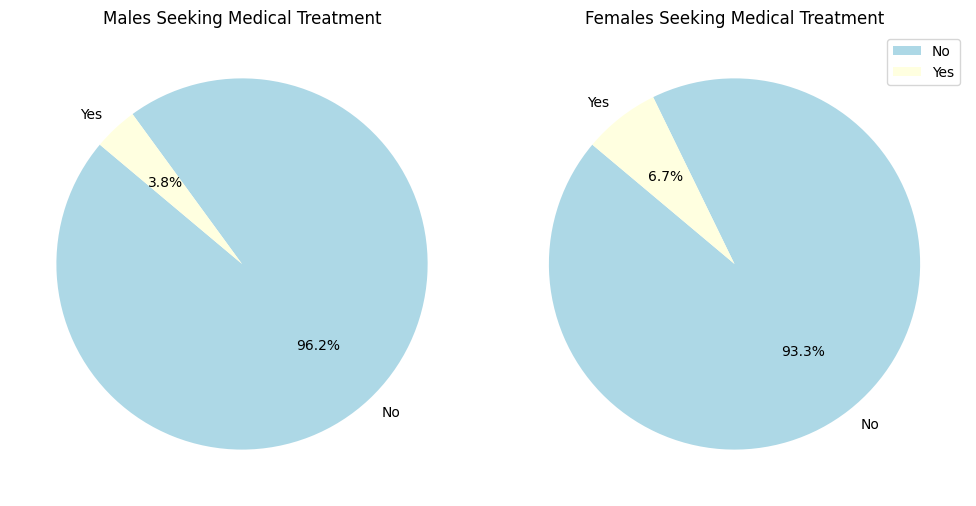

In [ ]:
male_treatment_counts = male_df['Did you seek any specialist for a treatment?'].value_counts()
female_treatment_counts = female_df['Did you seek any specialist for a treatment?'].value_counts()

colors = ['lightblue', 'lightyellow']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(male_treatment_counts, labels=male_treatment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Males Seeking Medical Treatment')

plt.subplot(1, 2, 2)
plt.pie(female_treatment_counts, labels=female_treatment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Females Seeking Medical Treatment')
#plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()


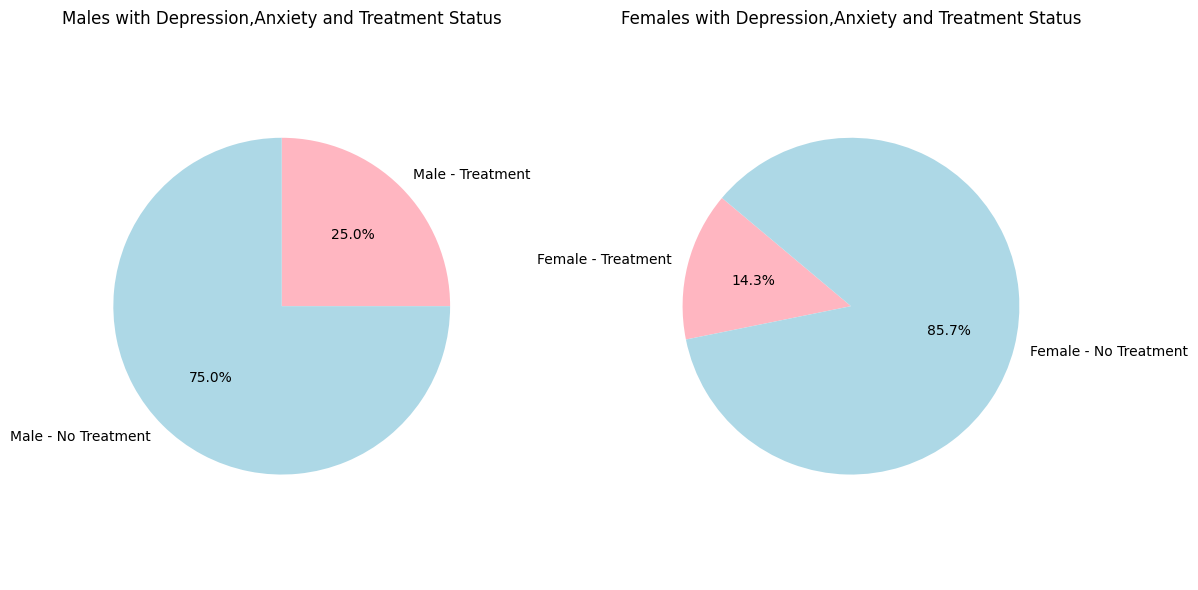

In [ ]:
male_depression_anxiety_treatment_df = male_df[(male_df['Do you have Depression?'] == 'Yes') &
                                               (male_df['Do you have Anxiety?'] == 'Yes') &
                                               (male_df['Did you seek any specialist for a treatment?'] == 'Yes')]
female_depression_anxiety_treatment_df = female_df[(female_df['Do you have Depression?'] == 'Yes') &
                                                   (female_df['Do you have Anxiety?'] == 'Yes') &
                                                   (female_df['Did you seek any specialist for a treatment?'] == 'Yes')]

#  males and females having depression, anxiety, and not seeking medical treatment
male_depression_anxiety_no_treatment_df = male_df[(male_df['Do you have Depression?'] == 'Yes') &
                                                  (male_df['Do you have Anxiety?'] == 'Yes') &
                                                  (male_df['Did you seek any specialist for a treatment?'] == 'No')]

female_depression_anxiety_no_treatment_df = female_df[(female_df['Do you have Depression?'] == 'Yes') &
                                                      (female_df['Do you have Anxiety?'] == 'Yes') &
                                                      (female_df['Did you seek any specialist for a treatment?'] == 'No')]

male_total_count = len(male_df)
female_total_count = len(female_df)
male_treatment_count = len(male_depression_anxiety_treatment_df)
female_treatment_count = len(female_depression_anxiety_treatment_df)
male_no_treatment_count = len(male_depression_anxiety_no_treatment_df)
female_no_treatment_count = len(female_depression_anxiety_no_treatment_df)
# Calculate the percentages
male_treatment_percentage = (male_treatment_count / male_total_count) * 100
female_treatment_percentage = (female_treatment_count / female_total_count) * 100
male_no_treatment_percentage = (male_no_treatment_count / male_total_count) * 100
female_no_treatment_percentage = (female_no_treatment_count / female_total_count) * 100
# Plotting two pie charts
labels = ['Male - Treatment', 'Male - No Treatment']
sizes = [male_treatment_percentage, male_no_treatment_percentage]
colors = ['lightpink', 'lightblue']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0)
plt.title('Males with Depression,Anxiety and Treatment Status')
plt.axis('equal')

labels = ['Female - Treatment', 'Female - No Treatment']
sizes = [female_treatment_percentage, female_no_treatment_percentage]
colors = ['lightpink', 'lightblue']

plt.subplot(1, 2, 2)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Females with Depression,Anxiety and Treatment Status')
plt.axis('equal')

plt.tight_layout()
plt.show()


In [ ]:
age_brackets = [(18, 20), (21, 23), (24, 26), (27, 29)]

def categorize_age(age):
    for lower, upper in age_brackets:
        if lower <= age <= upper:
            return f"{lower}-{upper}"
    return "unknown"

df['Age Bracket'] = df['Age'].apply(categorize_age)
# Count the number of people in each age bracket
age_group_counts = df['Age Bracket'].value_counts().sort_index()

print("Number of people in each age group:")
print(age_group_counts)

Number of people in each age group:
18-20      59
21-23      18
24-26      23
unknown     1
Name: Age Bracket, dtype: int64


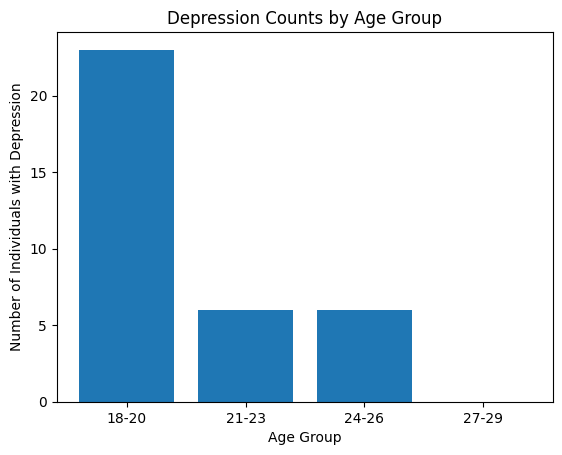

Age group with the highest depression count: 18-20


In [ ]:
depression_counts = {}
for bracket in age_brackets:
    age_group_df = df[(df['Age'] >= bracket[0]) & (df['Age'] <= bracket[1])]
    depression_counts[bracket] = age_group_df['Do you have Depression?'].value_counts().get('Yes', 0)

max_depression_bracket = max(depression_counts, key=depression_counts.get)
plt.bar(range(len(depression_counts)), list(depression_counts.values()), align='center')
plt.xticks(range(len(depression_counts)), [f"{bracket[0]}-{bracket[1]}" for bracket in depression_counts.keys()])
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals with Depression')
plt.title('Depression Counts by Age Group')
plt.show()
print("Age group with the highest depression count:", f"{max_depression_bracket[0]}-{max_depression_bracket[1]}")

  Age Bracket  Percentage of people taking treatment
0       18-20                               5.084746
1       21-23                               5.555556
2       24-26                               8.695652


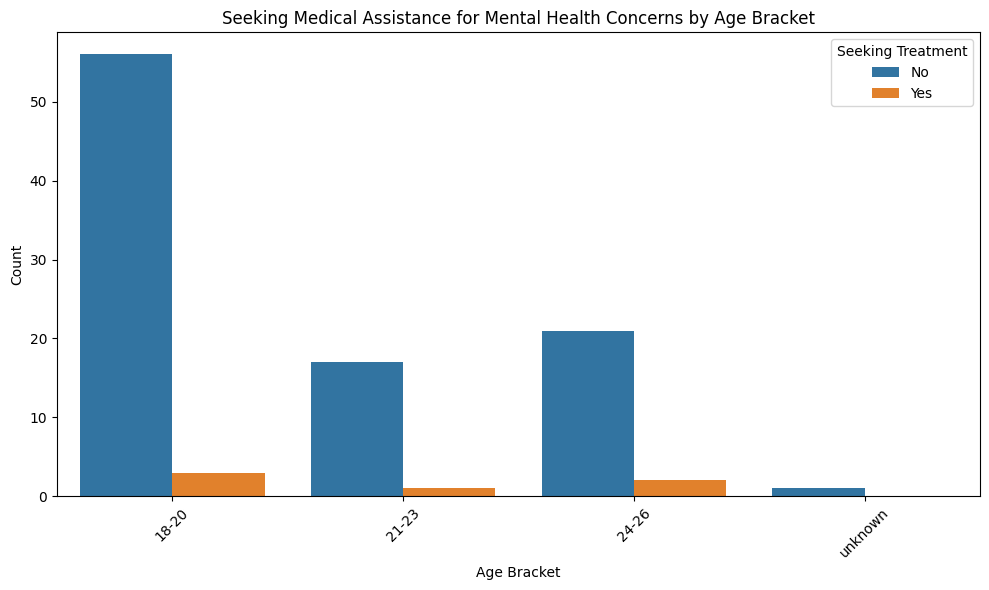

In [ ]:
treatment_percentage = df.groupby('Age Bracket')['Did you seek any specialist for a treatment?'] \
    .value_counts(normalize=True)[:, 'Yes'] \
    .mul(100) \
    .rename('Percentage of people taking treatment') \
    .reset_index()
print(treatment_percentage)
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Bracket', hue='Did you seek any specialist for a treatment?', data=df)
plt.title('Seeking Medical Assistance for Mental Health Concerns by Age Bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Count')
plt.legend(title='Seeking Treatment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

df = pd.read_csv('/content/Student Mental health.csv')
X = df[['Do you have Depression?', 'Do you have Anxiety?']]
y = df['Do you have Panic attack?']
encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(X)
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)
print("Number of columns in encoded features:", X_encoded.shape[1])
print("Feature names obtained from the encoder:", encoder.get_feature_names_out(['Do you have Depression?', 'Do you have Anxiety?']))
X_resampled_df = pd.DataFrame(X_resampled)
df_resampled = pd.concat([X_resampled_df, pd.DataFrame({'Do you have Panic attack?': y_resampled})], axis=1)
df_resampled.to_csv('/content/expanded_dataset_with_smote.csv', index=False)


Number of columns in encoded features: 2
Feature names obtained from the encoder: ['Do you have Depression?_Yes' 'Do you have Anxiety?_Yes']


In [ ]:
import pandas as pd
import numpy as np
import random

df = pd.read_csv('/content/Student Mental health.csv')
desired_size = 1500
additional_entries = desired_size - len(df)
additional_data = {
    'Timestamp': pd.date_range(start='2022-01-01', periods=additional_entries, freq='D'),
    'Choose your gender': np.random.choice(df['Choose your gender'], size=additional_entries),
    'Age': np.random.randint(df['Age'].min(), df['Age'].max() + 1, size=additional_entries),
    'What is your course?': np.random.choice(df['What is your course?'], size=additional_entries),
    'Your current year of Study': np.random.choice(df['Your current year of Study'], size=additional_entries),
    'What is your CGPA?': np.random.choice(df['What is your CGPA?'], size=additional_entries),
    'Marital status': np.random.choice(df['Marital status'], size=additional_entries),
    'Do you have Depression?': np.random.choice(df['Do you have Depression?'], size=additional_entries),
    'Do you have Anxiety?': np.random.choice(df['Do you have Anxiety?'], size=additional_entries),
    'Do you have Panic attack?': np.random.choice(df['Do you have Panic attack?'], size=additional_entries),
    'Did you seek any specialist for a treatment?': np.random.choice(df['Did you seek any specialist for a treatment?'], size=additional_entries)
}
new_df = pd.concat([df, pd.DataFrame(additional_data)], ignore_index=True)
new_df.to_csv('/content/expanded_dataset.csv', index=False)


In [ ]:
import pandas as pd
df = pd.read_csv("/content/expanded_dataset.csv")
def map_yes_no(value):
    if value == "Yes":
        return 1
    elif value == "No":
        return 0
    else:
        return value
columns_to_convert = ["Do you have Depression?", "Do you have Anxiety?", "Do you have Panic attack?"]
for col in columns_to_convert:
    df[col] = df[col].apply(map_yes_no)
df.to_csv("modified_dataset.csv", index=False)


In [ ]:
Data = pd.read_csv('/content/modified_dataset.csv')
correlation=Data.corr()
print(correlation['Do you have Panic attack?'].sort_values(ascending=False))

Do you have Panic attack?                       1.000000
Do you have Anxiety?                            0.730781
Your current year of Study                      0.598857
Did you seek any specialist for a treatment?    0.241675
Marital status                                  0.207485
Age                                             0.153903
Do you have Depression?                         0.142753
Name: Do you have Panic attack?, dtype: float64


<ipython-input-31-bf58ff8e6071>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=Data.corr()


<ipython-input-32-29379f0eded5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr(),cmap="YlGnBu",annot=True);


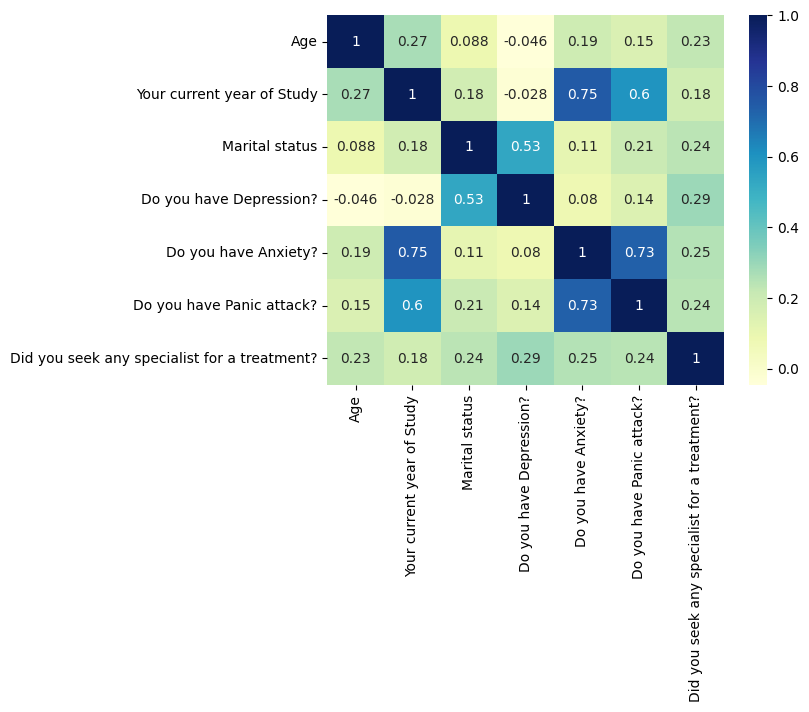

In [ ]:
sns.heatmap(Data.corr(),cmap="YlGnBu",annot=True);

In [ ]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('/content/modified_dataset.csv')


In [ ]:
data = pd.get_dummies(data, columns=['Choose your gender', 'Marital status', 'Your current year of Study', 'What is your CGPA?', 'What is your course?', 'Did you seek any specialist for a treatment?'], drop_first=True)
X = data[['Do you have Depression?', 'Do you have Anxiety?']]
y = data['Do you have Panic attack?']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
accuracy1 = accuracy_score(y_test, rf_pred)
classification_rep = classification_report(y_test, rf_pred)
print(f"Accuracy: {accuracy1}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9047619047619048
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.78      0.88         9

    accuracy                           0.90        21
   macro avg       0.93      0.89      0.90        21
weighted avg       0.92      0.90      0.90        21



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
model = XGBClassifier()
model.fit(X_train, y_train)
with open("xgboost_model.pkl", "wb") as f:
    pickle.dump(model, f)
y_pred = model.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy2)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9523809523809523
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.92      0.96        12

    accuracy                           0.95        21
   macro avg       0.95      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

accuracy3 = accuracy_score(y_test, dt_pred)
classification_rep = classification_report(y_test, dt_pred)
print(f"Accuracy: {accuracy3}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.9047619047619048
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.78      0.88         9

    accuracy                           0.90        21
   macro avg       0.93      0.89      0.90        21
weighted avg       0.92      0.90      0.90        21



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
logreg_model = LogisticRegression(random_state=30)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

accuracy4 = accuracy_score(y_test, logreg_pred)
classification_rep = classification_report(y_test, logreg_pred)

print(f"Accuracy: {accuracy4}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.67      0.80         9

    accuracy                           0.86        21
   macro avg       0.90      0.83      0.84        21
weighted avg       0.89      0.86      0.85        21



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

accuracy5 = accuracy_score(y_test, svm_pred)
conf_matrix = confusion_matrix(y_test, svm_pred)
classification_rep = classification_report(y_test, svm_pred)

print(f"Accuracy: {accuracy5}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8095238095238095
Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       1.00      0.67      0.80        12

    accuracy                           0.81        21
   macro avg       0.85      0.83      0.81        21
weighted avg       0.87      0.81      0.81        21



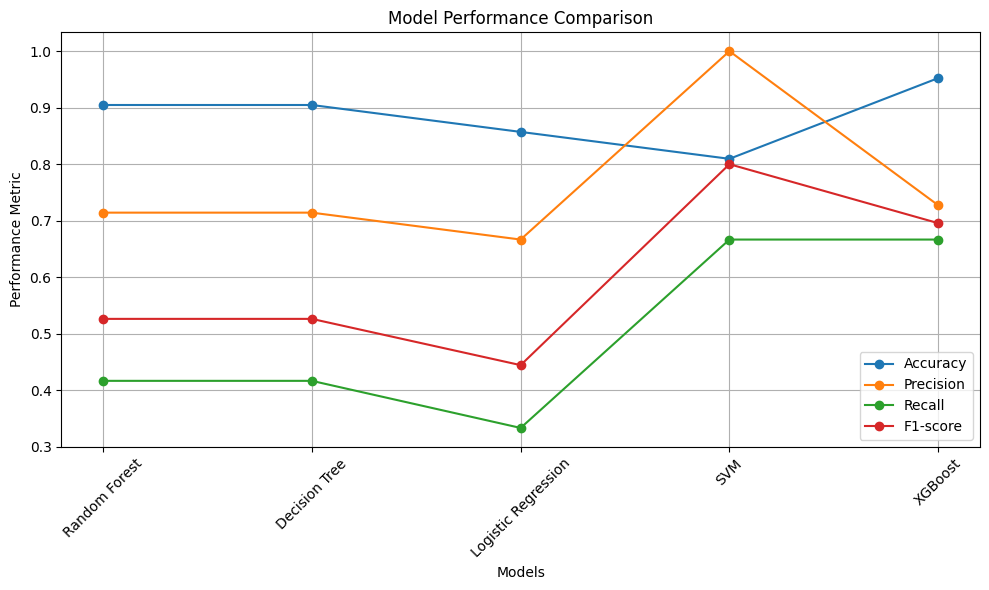

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt

# Accuracy scores for each model
accuracy_scores = {
    "Random Forest": accuracy1,
    "Decision Tree": accuracy3,
    "Logistic Regression": accuracy4,
    "SVM": accuracy5,
    "XGBoost": accuracy2
}

# Precision scores for each model
precision_scores = {
    "Random Forest": precision_score(y_test, rf_pred),
    "Decision Tree": precision_score(y_test, dt_pred),
    "Logistic Regression": precision_score(y_test, logreg_pred),
    "SVM": precision_score(y_test, svm_pred),
    "XGBoost": precision_score(y_test, y_pred)
}

# Recall scores for each model
recall_scores = {
    "Random Forest": recall_score(y_test, rf_pred),
    "Decision Tree": recall_score(y_test, dt_pred),
    "Logistic Regression": recall_score(y_test, logreg_pred),
    "SVM": recall_score(y_test, svm_pred),
    "XGBoost": recall_score(y_test, y_pred)
}

# F1 scores for each model
f1_scores = {
    "Random Forest": f1_score(y_test, rf_pred),
    "Decision Tree": f1_score(y_test, dt_pred),
    "Logistic Regression": f1_score(y_test, logreg_pred),
    "SVM": f1_score(y_test, svm_pred),
    "XGBoost": f1_score(y_test, y_pred)
}

# Extract model names and performance metrics
model_names = list(accuracy_scores.keys())

# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(model_names, list(accuracy_scores.values()), marker='o', label='Accuracy')
# Plot precision
plt.plot(model_names, list(precision_scores.values()), marker='o', label='Precision')
# Plot recall
plt.plot(model_names, list(recall_scores.values()), marker='o', label='Recall')
# Plot F1-score
plt.plot(model_names, list(f1_scores.values()), marker='o', label='F1-score')

plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Performance Metric')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pickle
with open("xgboost_model.pkl", "rb") as f:
    model = pickle.load(f)
def predict_panic_attack(input_data):
    user_input = np.array([[
        input_data['Do you have Depression?'],
        input_data['Do you have Anxiety?']
    ]])

    prediction = model.predict(user_input)

    return prediction

user_input = {}
user_input['Choose your gender'] = input("Enter your gender: ")
user_input['Age'] = int(input("Enter your age: "))
user_input['What is your course?'] = input("Enter your course: ")
user_input['Your current year of Study'] = input("Enter your current year of study: ")
user_input['What is your CGPA?'] = input("Enter your CGPA: ")
user_input['Marital status'] = input("Enter your marital status: ")
user_input['Do you have Depression?'] = int(input("Do you have Depression? (0/1): "))
user_input['Do you have Anxiety?'] = int(input("Do you have Anxiety? (0/1): "))
user_input['Did you seek any specialist for a treatment?'] = int(input("Did you seek any specialist for a treatment? (0/1): "))

# Make prediction using user input
prediction = predict_panic_attack(user_input)
print("Predicted Panic Attack:", prediction)



Enter your gender: Female
Enter your age: 25
Enter your course: Engineering
Enter your current year of study: 4
Enter your CGPA: 3.50-4.5
Enter your marital status: 1
Do you have Depression? (0/1): 1
Do you have Anxiety? (0/1): 1
Did you seek any specialist for a treatment? (0/1): 0
Predicted Panic Attack: [1]


In [ ]:

if prediction == 1:
    print("The model predicts that you may experience a panic attack.")
else:
    print("The model predicts that you may not experience a panic attack.")


The model predicts that you may experience a panic attack.
